# Analysis of XRD data from Efficient targeted cancer cell detection, isolation and enumeration using immuno-nano/hybrid magnetic microgels

https://doi.org/10.1039/C9BM00552H

https://pubpeer.com/publications/E105D6D36191FC4991C42FA3577F81

In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
collect = []
data_df = pd.read_excel('../data/Fig.2A (1).xlsx', sheet_name='Sample I', header=1)
data_df['sample'] = '2A_I'
collect.append(data_df)

data_df = pd.read_excel('../data/Fig.2A (1).xlsx', sheet_name='Sample II', header=0)
data_df = data_df[['Pos. [°2Th.]','Iobs [cts]']].copy()
data_df.columns = ['2theta', 'intensity']
data_df['sample'] = '2A_II'
collect.append(data_df)

data_df = pd.read_excel('../data/Fig.2A (1).xlsx', sheet_name='Sample III', header=0)
data_df = data_df[['Pos. [°2Th.]','Iobs [cts]']].copy()
data_df.columns = ['2theta', 'intensity']
data_df['sample'] = '2A_III'
collect.append(data_df)

data_df = pd.read_excel('../data/Fig.S1 (1).xlsx', sheet_name='sample II', header=0)
data_df = data_df[['Pos. [°2Th.]','Iobs [cts]']].copy()
data_df.columns = ['2theta', 'intensity']
data_df['sample'] = 'S1_II'
collect.append(data_df)

data_df = pd.read_excel('../data/Fig.S1 (1).xlsx', sheet_name='Sample III', header=0)
data_df = data_df[['Pos. [°2Th.]','Iobs [cts]']].copy()
data_df.columns = ['2theta', 'intensity']
data_df['sample'] = 'S1_III'
collect.append(data_df)

data_df = pd.concat(collect)
data_df = data_df[['2theta', 'intensity', 'sample']].copy()
data_df = data_df.dropna()

In [3]:
def make_list_str(listy):
    return ','.join([str(x) for x in listy])

In [23]:
repeat_df_collect = []
for sample in data_df['sample'].unique():
    data_df_slice = data_df[data_df['sample'] == sample]
    a = data_df_slice['intensity'].values
    collect = []
    n_deg = 2.5
    step = 0.02
    len_chunk = int(n_deg/step)
    for index in range(0, len(a)-len_chunk):
        chunk = a[index:index+len_chunk]
        chunk = chunk - np.min(chunk)
        collect.append(chunk)
        
    repeat_df = pd.DataFrame(collect)
    cols = repeat_df.columns
    repeat_df['list'] = collect
    repeat_df['index_n'] = range(0, len(a)-len_chunk)
    repeat_df['sample'] = sample
    repeat_df_collect.append(repeat_df)
repeat_df = pd.concat(repeat_df_collect)
repeat_df['list_str'] = repeat_df['list'].apply(make_list_str)

In [24]:
repeats_value_counts = repeat_df[['sample', 'list_str']].value_counts()

In [25]:
repeat_df['sample'].unique()

array(['2A_I', '2A_II', '2A_III', 'S1_II', 'S1_III'], dtype=object)

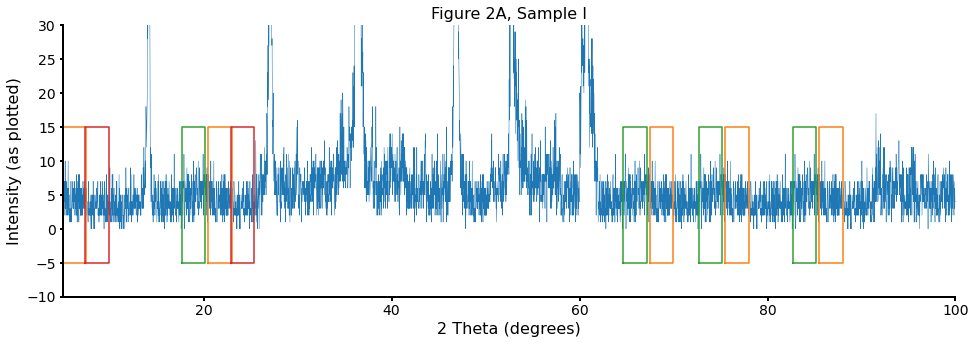

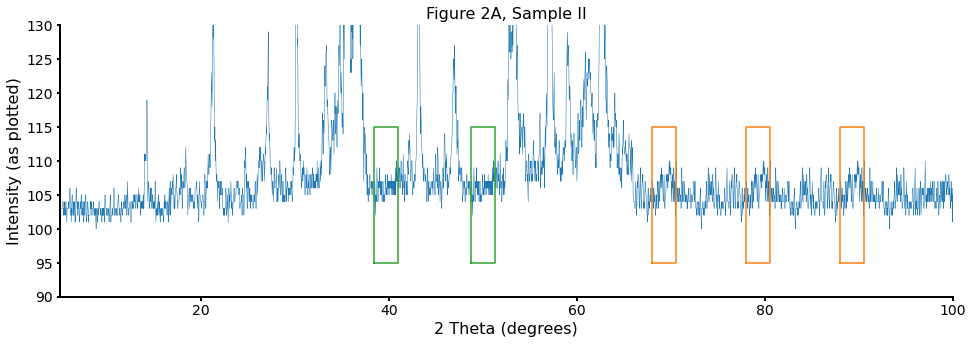

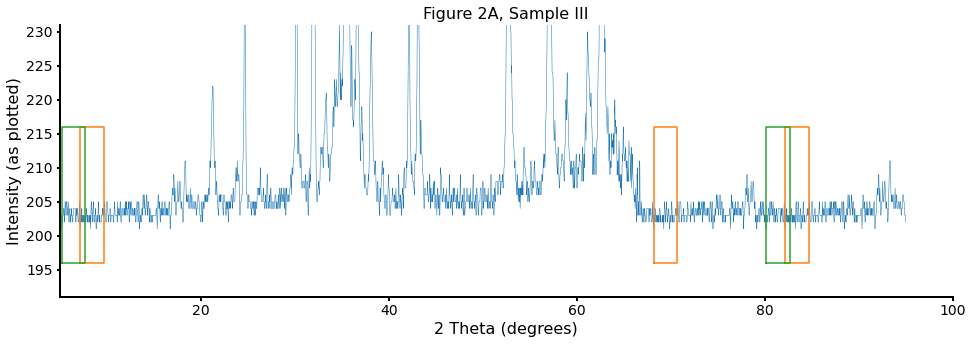

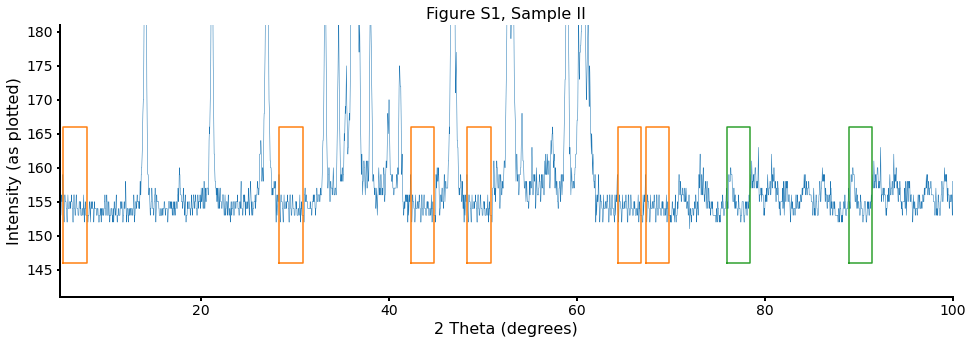

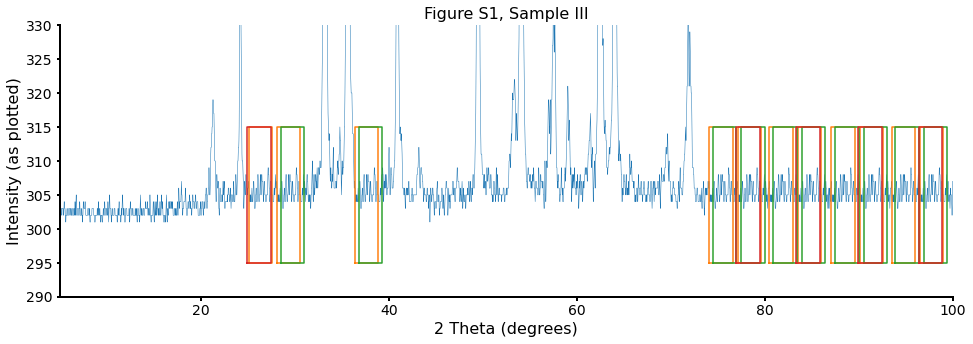

In [26]:
for sample in ['2A_I', '2A_II', '2A_III', 'S1_II', 'S1_III']:
    data_df_slice = data_df[data_df['sample'] == sample]
    x_axis = data_df_slice['2theta']

    min_val = data_df_slice['intensity'].min()

    fig = plt.figure(figsize=(16,5))
    ax = plt.gca()
    plt.plot(data_df_slice['2theta'], data_df_slice['intensity'], linewidth=0.5)

    prev_val = 0
    count = 1
    for list_str, val in repeats_value_counts.loc[sample].items():
        if (val != prev_val) & (val > 1) & (count < 4):
            repeat_df_slice = repeat_df[repeat_df['list_str'] == list_str]
            for index_n in repeat_df_slice['index_n'].values:
                ax.plot([x_axis[index_n], x_axis[index_n], 
                          x_axis[index_n] + n_deg, x_axis[index_n] + n_deg, 
                         x_axis[index_n]], [min_val-5,min_val+15,min_val+15,min_val-5, min_val-5], 
                        color=sns.color_palette()[count])
            count += 1
        prev_val = val
    ax.set_xlim([5,100])
    ax.set_ylim([min_val-10,min_val+30])
    ax.set_title('Figure ' + sample.split('_')[0] + ', Sample ' + sample.split('_')[1], fontsize=16)
    [ax.spines[i].set_linewidth(2) for i in ax.spines]

    ax.tick_params(width=2)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('Intensity (as plotted)', fontsize=16)
    ax.set_xlabel('2 Theta (degrees)', fontsize=16)

    fig.savefig('../img/' + sample + '.png', dpi=200, bbox_inches='tight')

In [27]:
len_chunk

125